In [1]:
!pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [3]:
minmaxscaler=MinMaxScaler()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls -lah '/content/drive/MyDrive/dataset_satellite'

total 4.0K
drwx------ 2 root root 4.0K Feb 23 13:42 'Semantic segmentation dataset'


In [6]:
dataset_root_folder='/content/drive/MyDrive/dataset_satellite'

In [7]:
dataset_name='Semantic segmentation dataset'

In [8]:
for path,subdir,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name=path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name=='masks':
    images=os.listdir(path)
    # print(path)
    print(images)
    for i,image_name in enumerate(images):
      if(image_name.endswith('.png')):
        # print(image_name)
        a=True


['image_part_004.png', 'image_part_007.png', 'image_part_001.png', 'image_part_003.png', 'image_part_009.png', 'image_part_002.png', 'image_part_005.png', 'image_part_006.png', 'image_part_008.png']
['image_part_002.png', 'image_part_001.png', 'image_part_005.png', 'image_part_004.png', 'image_part_008.png', 'image_part_009.png', 'image_part_003.png', 'image_part_007.png', 'image_part_006.png']
['image_part_008.png', 'image_part_004.png', 'image_part_001.png', 'image_part_003.png', 'image_part_007.png', 'image_part_002.png', 'image_part_006.png', 'image_part_005.png', 'image_part_009.png']
['image_part_001.png', 'image_part_003.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png', 'image_part_006.png', 'image_part_004.png', 'image_part_002.png', 'image_part_005.png']
['image_part_001.png', 'image_part_008.png', 'image_part_009.png', 'image_part_004.png', 'image_part_007.png', 'image_part_003.png', 'image_part_005.png', 'image_part_006.png', 'image_part_002.png']
['ima

In [9]:
image_patch_size=256

In [10]:
image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/image/image_part_001.jpg',1)

In [11]:
image_dataset=[]
mask_dataset=[]

for image_type in ['images','masks']:
  if image_type=='images':
    image_extension='jpg'
  elif image_type=='masks':
    image_extension='png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:

        if image_type=='masks':
          image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        # print(image)
        size_x=(image.shape[1]//image_patch_size)*image_patch_size
        size_y=(image.shape[0]//image_patch_size)*image_patch_size
        # print("{}  ---  {}  -  {}".format(image.shape, size_x , size_y))
        image=Image.fromarray(image)
        image=image.crop((0,0,size_x,size_y))
        image=np.array(image)
        patched_image=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
        for i in range(patched_image.shape[0]):
          for j in range(patched_image.shape[1]):
            if image_type=='images':
              individual_patched_image=patched_image[i,j,:,:]
              # print(individual_patched_image.shape)
              individual_patched_image=minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image=individual_patched_image[0]
              # print(individual_patched_image);
              image_dataset.append(individual_patched_image)
            elif image_type=='masks':
              individual_patched_mask=patched_image[i,j,:,:]
              individual_patched_mask=individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [12]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [13]:
image_dataset=np.array(image_dataset)
mask_dataset=np.array(mask_dataset)

In [14]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [15]:
mask_dataset[0].shape

(256, 256, 3)

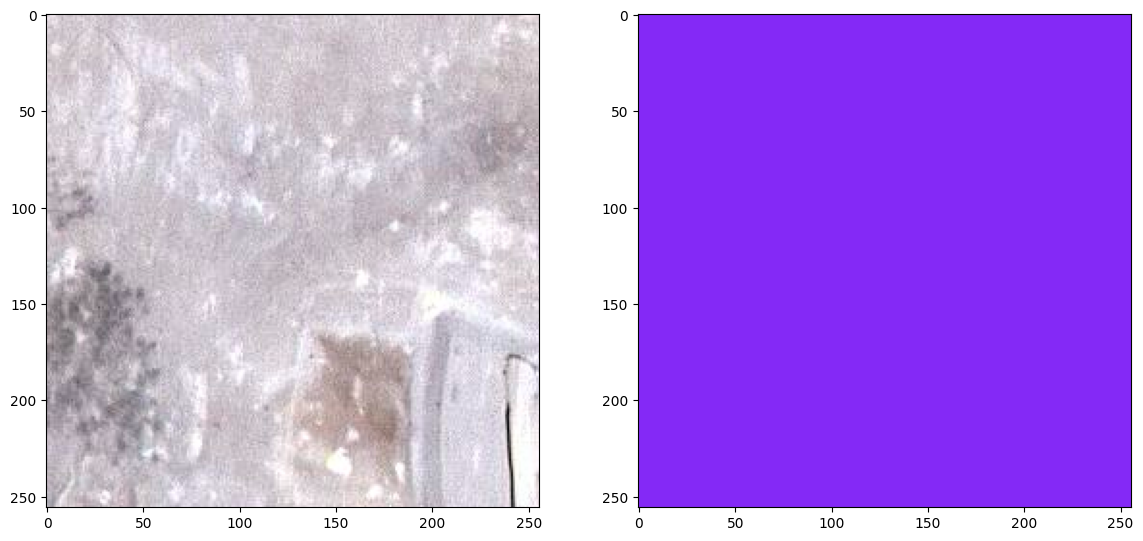

In [16]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [17]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [18]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  return label_segment

In [19]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  if i==0:
    print(label)
    print(label.shape)
  labels.append(label)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(256, 256)


In [20]:
labels = np.array(labels)

In [21]:
labels[0].shape

(256, 256)

In [22]:
labels = np.expand_dims(labels, axis=3)

In [23]:
labels.shape

(945, 256, 256, 1)

In [24]:
labels[0][:,:,0].shape

(256, 256)

In [25]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

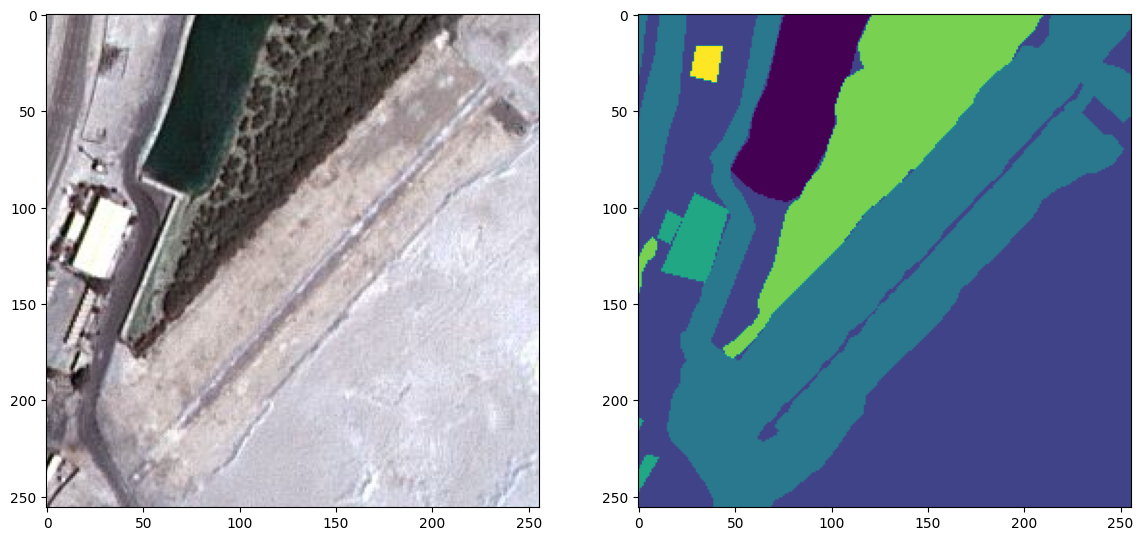

In [26]:
random_image_id=random.randint(0,len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
# plt.subplot(121)
# plt.imshow(mask_dataset[random_image_id])
plt.subplot(122)

plt.imshow(labels[random_image_id])

In [27]:
total_classes=len(np.unique(labels))
total_classes

6

In [28]:
from keras.utils import to_categorical
labels_categorical_dataset=to_categorical(labels,num_classes=total_classes)
print("{} {}".format(labels_categorical_dataset.shape,labels.shape))

(945, 256, 256, 6) (945, 256, 256, 1)


In [29]:
master_training_dataset=image_dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(master_training_dataset,labels_categorical_dataset,test_size=0.15,random_state=100)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [33]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

#Applying Deep Learning model on training dataset

In [34]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [35]:
from keras import backend as K

In [36]:
def jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=intersection+1.0/(K.sum(y_true_flatten)+K.sum(y_pred_flatten)-intersection+1.0)
  return final_coef_value

In [37]:
def multi_unit_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  inputs = Input((image_height,image_width,image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(c1)
  p1=MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(364, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6,c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7,c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8,c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9,c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal",padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model=Model(inputs=[inputs], outputs=[outputs])
  return model

In [38]:
metrics=["accuracy", jaccard_coef]

In [39]:
def get_deep_learning_model():
  return multi_unit_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [40]:
model=get_deep_learning_model()

In [41]:
# model.get_config()

#Generating loss function

In [42]:
weights=[0.166,0.166,0.166,0.166,0.166,0.166]

In [43]:
!pip install -U segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.5 MB/s eta 0:00:00


In [44]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"


import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [45]:
dice_loss=sm.losses.DiceLoss(class_weights=weights)

In [46]:
focal_loss=sm.losses.CategoricalFocalLoss()

In [47]:
total_loss=dice_loss+(1*focal_loss)

#Model Compilation

In [48]:
 import tensorflow as tf

In [49]:
tf.keras.backend.clear_session()

In [50]:
model.compile(optimizer="adam",loss=total_loss,metrics=metrics)

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [52]:
model_history=model.fit(X_train,y_train,
                        batch_size=32,
                        verbose=1,
                        epochs=10,
                        validation_data=(X_test,y_test),
                        shuffle=False)

Epoch 1/10
26/26 [==============================] - 62s 899ms/step - loss: 0.9983 - accuracy: 0.5614 - jaccard_coef: 868294.1250 - val_loss: 0.9927 - val_accuracy: 0.5977 - val_jaccard_coef: 837438.3750
Epoch 2/10
26/26 [==============================] - 12s 479ms/step - loss: 0.9890 - accuracy: 0.6442 - jaccard_coef: 1031454.0625 - val_loss: 0.9833 - val_accuracy: 0.6738 - val_jaccard_coef: 948010.1875
Epoch 3/10
26/26 [==============================] - 12s 475ms/step - loss: 0.9751 - accuracy: 0.6829 - jaccard_coef: 1146282.1250 - val_loss: 0.9691 - val_accuracy: 0.6976 - val_jaccard_coef: 1088602.2500
Epoch 4/10
26/26 [==============================] - 13s 486ms/step - loss: 0.9655 - accuracy: 0.6992 - jaccard_coef: 1248580.5000 - val_loss: 0.9627 - val_accuracy: 0.7337 - val_jaccard_coef: 1127634.7500
Epoch 5/10
26/26 [==============================] - 13s 488ms/step - loss: 0.9588 - accuracy: 0.7285 - jaccard_coef: 1298782.2500 - val_loss: 0.9709 - val_accuracy: 0.6867 - val_jacca

In [53]:
y_pred=model.predict(X_test)

5/5 [==============================] - 1s 101ms/step


In [54]:
y_pred_argmax = np.argmax(y_pred, axis=3)
y_test_argmax = np.argmax(y_test, axis=3)

In [55]:
import random

In [66]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

# test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 302ms/step


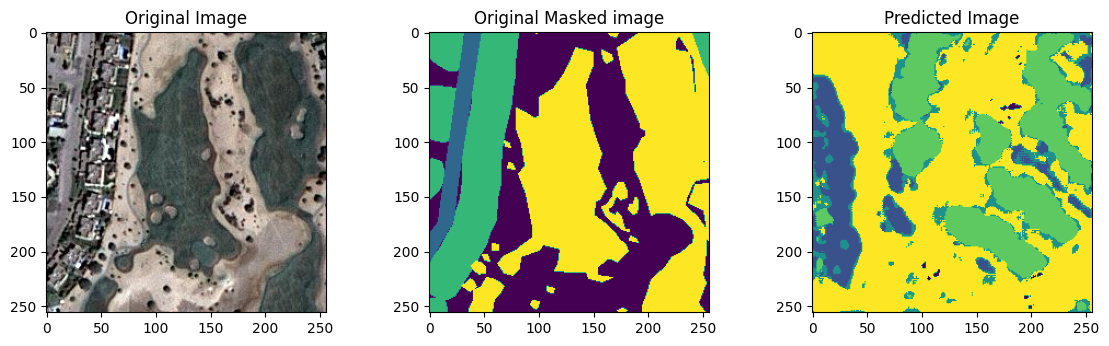

In [67]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)